# **PROJECT OBJECTIVE**: University’s management require an automation which can create a classifier capable of determining a plant's species from a photo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('drive/MyDrive')

# 1. Import the data. Analyse the dimensions of the data. Visualise the data.

In [ ]:
import zipfile
with zipfile.ZipFile('Dataset - Plant-seedlings-classification.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
import os
import cv2

X_train = []
y_train = []

for i in os.listdir('train'):
  count = 0
  for j in os.listdir('train/' + i):
    img = cv2.imread('train/' + i + '/' + j)
    img = cv2.resize(img, (128, 128))
    img.flatten()
    X_train.append(img)
    y_train.append(i)
    count = count + 1
  print(i, '-', count, 'images')

Black-grass - 263 images
Charlock - 390 images
Cleavers - 287 images
Common Chickweed - 611 images
Common wheat - 221 images
Fat Hen - 475 images
Loose Silky-bent - 654 images
Maize - 221 images
Scentless Mayweed - 516 images
Shepherds Purse - 231 images
Small-flowered Cranesbill - 496 images
Sugar beet - 385 images


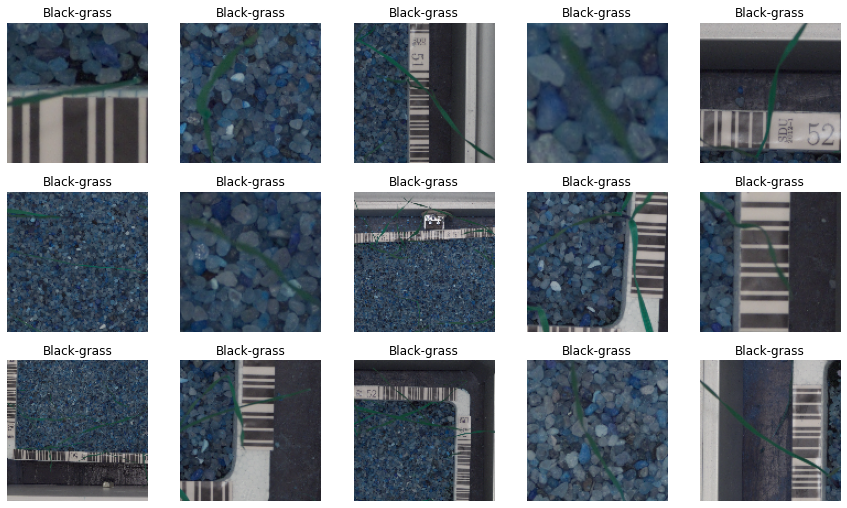

In [ ]:
# visualizing the data
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 15))
for i in range(15):
  plt.subplot(5, 5, i+1)
  plt.imshow(X_train[i])
  plt.title(y_train[i])
  plt.axis('off')
plt.show()

# 2. Train tune and test AIML image classifier model using:
## • Use supervised learning algorithms for training
## • Use neural networks for training
## • Use CNN for training

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=2)

In [ ]:
# reshaping data
import numpy as np

# resizing images into 128 x 128
X_train = np.array(X_train)
X_train = X_train.reshape(X_train.shape[0], 128, 128, 3)
X_train = X_train.astype('float32')/255

X_test = np.array(X_test)
X_test = X_test.reshape(X_test.shape[0], 128, 128, 3)
X_test = X_test.astype('float32')/255

print(X_train.shape)
print(X_test.shape)

(3800, 128, 128, 3)
(950, 128, 128, 3)


In [ ]:
# flattening the images

train_X = []
for i in range(len(X_train)):
    train_X.append(X_train[i,:].flatten())

test_X = []
for i in range(len(X_test)):
    test_X.append(X_test[i,:].flatten())

print(len(train_X))
print(len(test_X))

3800
950


In [ ]:
train_X = train_X[:1000]
test_X = test_X[:200]
y_train = y_train[:1000]
y_test = y_test[:200]

In [ ]:
# logistic regression for supervised learning

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(solver='lbfgs')
lr.fit(train_X, y_train)

y_pred = lr.predict(train_X)
print('Train Accuracy :', accuracy_score(y_train, y_pred))

y_pred = lr.predict(test_X)
print('Test Accuracy :', accuracy_score(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Train Accuracy : 1.0
Test Accuracy : 0.425


In [ ]:
# neural network model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=2)

In [ ]:
# reshaping data
import numpy as np

# resizing arrays into 2D for scaling
X_train = np.array(X_train)
X_train = X_train.reshape(X_train.shape[0], 49152)
X_train = X_train.astype('float32')/255

X_test = np.array(X_test)
X_test = X_test.reshape(X_test.shape[0], 49152)
X_test = X_test.astype('float32')/255

print(X_train.shape)
print(X_test.shape)

(3800, 49152)
(950, 49152)


In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# scaling data
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

# one hot encoding numpy arrays
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [ ]:
import keras
from keras import losses, optimizers
from keras.layers import Dropout, MaxPooling2D, BatchNormalization, Dense, Activation
from keras.models import Sequential

model = Sequential()  
model.add(BatchNormalization(input_shape = (49152,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(12, activation='softmax'))
    
# compiling
adam = optimizers.Adam(lr=1e-3)
model.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy'])

# training the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=20, verbose=1)

Epoch 1/30
190/190 [==============================] - 3s 11ms/step - loss: 4.3380 - accuracy: 0.1412 - val_loss: 2.3988 - val_accuracy: 0.1516
Epoch 2/30
190/190 [==============================] - 2s 10ms/step - loss: 2.3050 - accuracy: 0.2069 - val_loss: 2.2673 - val_accuracy: 0.2274
Epoch 3/30
190/190 [==============================] - 2s 10ms/step - loss: 2.0554 - accuracy: 0.2803 - val_loss: 1.9510 - val_accuracy: 0.2937
Epoch 4/30
190/190 [==============================] - 2s 10ms/step - loss: 1.7781 - accuracy: 0.3578 - val_loss: 1.8892 - val_accuracy: 0.3558
Epoch 5/30
190/190 [==============================] - 2s 10ms/step - loss: 1.6581 - accuracy: 0.4128 - val_loss: 1.8005 - val_accuracy: 0.3926
Epoch 6/30
190/190 [==============================] - 2s 10ms/step - loss: 1.4574 - accuracy: 0.4920 - val_loss: 1.7045 - val_accuracy: 0.4316
Epoch 7/30
190/190 [==============================] - 2s 10ms/step - loss: 1.3981 - accuracy: 0.5141 - val_loss: 1.6950 - val_accuracy: 0.4074

In [ ]:
# cnn model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=2)

In [ ]:
# reshaping data
import numpy as np

# resizing images into 128 x 128
X_train = np.array(X_train)
X_train = X_train.reshape(X_train.shape[0], 128, 128, 3)
X_train = X_train.astype('float32')/255

X_test = np.array(X_test)
X_test = X_test.reshape(X_test.shape[0], 128, 128, 3)
X_test = X_test.astype('float32')/255

print(X_train.shape)
print(X_test.shape)

(3800, 128, 128, 3)
(950, 128, 128, 3)


In [ ]:
import pandas as pd

# one hot encoding numpy arrays
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import BatchNormalization, Convolution2D, Dropout, MaxPooling2D, Flatten, Dense, Activation
from keras import losses, optimizers

# building model
model = Sequential()
model.add(BatchNormalization(input_shape = (128, 128, 3))) # input layer
model.add(Convolution2D(filters = 64, kernel_size = 3, activation ='relu', input_shape = (128, 128, 3)))  # 2D convolution layer with kernel size 3 and 64 filters
model.add(MaxPooling2D(pool_size = 2)) # downsamples the input representetion within the pool_size size
model.add(BatchNormalization()) # normalizes output using the mean and standard deviation of the current batch of inputs
model.add(Convolution2D(filters = 64, kernel_size = 3, activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(BatchNormalization())
model.add(Convolution2D(filters = 128, kernel_size = 3, activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(BatchNormalization())
model.add(Convolution2D(filters = 128, kernel_size = 3, activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))

model.add(Flatten())

# dense layers after flattening the data

model.add(Dense(units = 128,activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 12, activation = 'softmax')) 

In [ ]:
adam = optimizers.Adam(lr=1e-3)
model.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 128, 128, 3)       12        
_________________________________________________________________
conv2d (Conv2D)              (None, 126, 126, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 63, 63, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 30, 64)        2

In [ ]:
# training the model
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_test, y_test))

Epoch 1/30
119/119 [==============================] - 38s 37ms/step - loss: 2.0793 - accuracy: 0.3129 - val_loss: 4.0028 - val_accuracy: 0.1274
Epoch 2/30
119/119 [==============================] - 3s 29ms/step - loss: 1.0037 - accuracy: 0.6579 - val_loss: 5.2069 - val_accuracy: 0.1337
Epoch 3/30
119/119 [==============================] - 3s 29ms/step - loss: 0.7041 - accuracy: 0.7661 - val_loss: 2.4254 - val_accuracy: 0.3358
Epoch 4/30
119/119 [==============================] - 4s 30ms/step - loss: 0.5632 - accuracy: 0.8009 - val_loss: 0.8924 - val_accuracy: 0.7179
Epoch 5/30
119/119 [==============================] - 4s 29ms/step - loss: 0.4288 - accuracy: 0.8442 - val_loss: 0.6913 - val_accuracy: 0.7937
Epoch 6/30
119/119 [==============================] - 3s 29ms/step - loss: 0.4136 - accuracy: 0.8597 - val_loss: 0.5594 - val_accuracy: 0.8337
Epoch 7/30
119/119 [==============================] - 4s 29ms/step - loss: 0.2797 - accuracy: 0.8955 - val_loss: 0.8742 - val_accuracy: 0.762

# 3. Compare the results from the above step along with your detailed observations. 

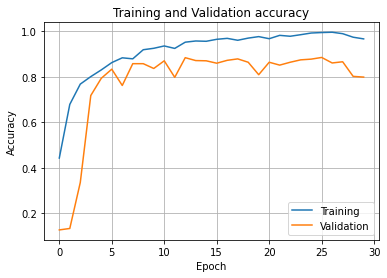

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc='best')
plt.grid(True)

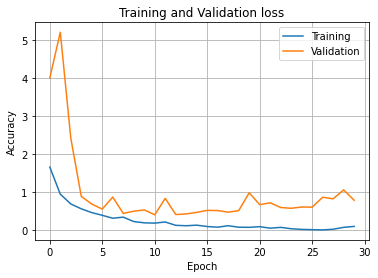

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc='best')
plt.grid(True)

*   From the above results we can see that CNN performs better than NN or supervised learning model
*   We get best training accuracy of 99% and validation accuracy of 88%

# 4. Pickle the best performing model.

In [ ]:
# saving the best model using model checkpoint
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('plant_classifier_CNN.h5', save_best_only=True, monitor='val_accuracy', mode='max', verbose = 1)

# 5. Import the the image in the “ Prediction” folder to predict the class. Display the image. Use the best trained image classifier model to predict the class.

In [ ]:
import zipfile
with zipfile.ZipFile('Dataset - Prediction.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
import cv2
import numpy as np

pred_img = cv2.imread('Prediction/Predict.png')
pred_img = cv2.resize(pred_img, (128, 128))

pred_img = np.array(pred_img)
pred_img = pred_img.reshape(1, 128, 128, 3)

In [ ]:
pred_img

array([[[[ 58,  77,  92],
         [ 64,  77,  91],
         [ 66,  79,  93],
         ...,
         [ 63,  92, 111],
         [ 74, 100, 119],
         [ 56,  78, 104]],

        [[ 53,  69,  85],
         [ 59,  74,  87],
         [ 56,  69,  85],
         ...,
         [ 65,  91, 110],
         [ 76, 100, 120],
         [ 60,  84, 107]],

        [[ 52,  67,  79],
         [ 35,  51,  69],
         [ 24,  35,  58],
         ...,
         [ 75,  94, 114],
         [ 76,  95, 112],
         [ 68,  87, 107]],

        ...,

        [[ 92, 111, 121],
         [ 85, 104, 118],
         [ 60,  81, 100],
         ...,
         [ 55,  88, 110],
         [ 46,  78,  99],
         [ 38,  57,  76]],

        [[ 62,  83,  98],
         [ 62,  79,  93],
         [ 60,  78,  96],
         ...,
         [ 52,  84, 103],
         [ 33,  48,  75],
         [ 43,  53,  73]],

        [[ 66,  82,  95],
         [ 72,  87, 100],
         [ 63,  80,  97],
         ...,
         [ 49,  83,  90],
        

In [ ]:
result = model.predict(pred_img)
result

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
np.argmax(result)

7

Image belongs to the class Maize

# **TASK**: Explain in depth why CNN out performs neural networks which in turn out perform supervised learning models when it comes to image classification. Use the markdown option in Jupiter for your answer.

Use of Supervised learning for image classification which is rich in information faces the problem of curse of dimensionality. This basically means that the error increases with the increase in the number of features. It refers to the fact that algorithms are harder to design in high dimensions and often have a running time exponential in the dimension.

Same goes for neural network as well. Given a dataset of gray scale images with the standardized size of 32×32 pixels each, a traditional feedforward neural network would require 1024 input weights (plus one bias). This is fair enough, but the flattening of the image matrix of pixels to a long vector of pixel values loses all of the spatial structure in the image. Unless all of the images are perfectly resized, the neural network will have great difficulty with the problem.

Convolutional Neural Networks on the other hand expect and preserve the spatial relationship between pixels by learning internal feature representations using small squares of input data. This preprocessing is done using convolution which when done in heirarchial layers. These layers help in reducing the feature matrix without losing the vital information and successfully captures the Spatial and Temporal dependencies in an image through the application of relevant filters. The initial such layers learns generic features and later layers learns specific features. Feature are learned and used across the whole image, allowing for the objects in the images to be shifted or translated in the scene and still detectable by the network.

The CNN also has the pooling layer which is responsible for reducing the spatial size of the Convolved Feature. This is to decrease the computational power required to process the data through dimensionality reduction. When used MaxPooling it helps as Noise Suppressant as well thus maintaining the process of effectively training of the model.

In above exercise we observed the computational efficiency observed when using CNN  in our above example. This is this reason why the network is so useful for object recognition in photographs, picking out digits, faces, objects and so on with varying orientation.

In summary, below are some benefits of using convolutional neural networks:
* Number of parameters (weights) to be learnt is less than a fully connected network.
* CNN model design are invariant to object position and distortion in the scene.
* CNN model automatically learn and generalize features from the input domain.

# **TASK**: Help to build the image dataset to be used by the AI team to build an  image classifier data. Import and display the images in python against their labels. Comment on the challenges faced during this task.

In [ ]:
import zipfile
with zipfile.ZipFile('Dataset - Images.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
import os

len(os.listdir('Images'))

15

We have 15 images in our dataset

In [ ]:
import os
import cv2
import pandas as pd

images = []
img_label = []
img_df = pd.DataFrame(index=['Name', 'Type', 'Size'])

for filename in os.listdir('Images'):
  img = cv2.imread(os.path.join('Images',filename))
  if img is not None:
    images.append(img)
    img_label.append(filename)
    img_df = img_df.append({'Name': filename,'Type': type(img),'Size': img.shape}, ignore_index=True)

In [ ]:
images

[array([[[241, 183, 161],
         [241, 183, 161],
         [241, 183, 161],
         ...,
         [244, 192, 175],
         [244, 192, 175],
         [244, 192, 175]],
 
        [[241, 183, 161],
         [241, 183, 161],
         [241, 183, 161],
         ...,
         [244, 192, 175],
         [244, 192, 175],
         [244, 192, 175]],
 
        [[242, 184, 162],
         [242, 184, 162],
         [242, 184, 162],
         ...,
         [245, 193, 176],
         [245, 193, 176],
         [245, 193, 176]],
 
        ...,
 
        [[ 55,  54,  58],
         [ 58,  57,  61],
         [ 59,  58,  62],
         ...,
         [ 55,  49,  54],
         [ 56,  50,  55],
         [ 57,  51,  56]],
 
        [[ 55,  54,  58],
         [ 56,  55,  59],
         [ 56,  55,  59],
         ...,
         [ 54,  48,  53],
         [ 52,  46,  51],
         [ 51,  45,  50]],
 
        [[ 52,  51,  55],
         [ 52,  51,  55],
         [ 51,  50,  54],
         ...,
         [ 58,  52,  57],
  

In [ ]:
img_df

,Name,Size,Type
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,00006.jpg,"(431, 575, 3)",<class 'numpy.ndarray'>
4,00007.jpg,"(480, 640, 3)",<class 'numpy.ndarray'>
5,00015.jpg,"(424, 640, 3)",<class 'numpy.ndarray'>
6,00012.jpg,"(315, 500, 3)",<class 'numpy.ndarray'>
7,00009.jpg,"(843, 1280, 3)",<class 'numpy.ndarray'>
8,00004.jpg,"(1386, 2100, 3)",<class 'numpy.ndarray'>
9,00003.jpg,"(480, 640, 3)",<class 'numpy.ndarray'>


The image files are stored in the form of arrays with value from 0 to 255 for each channel.

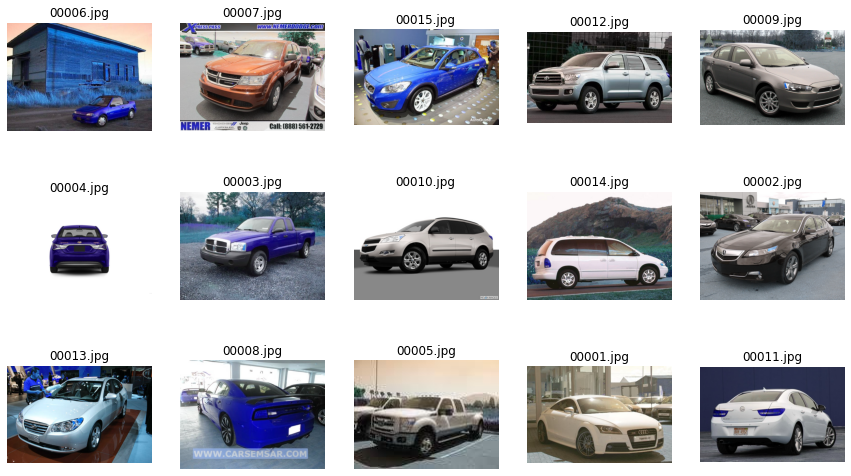

In [ ]:
# visualizing the data

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 15))
for i in range(15):
  plt.subplot(5, 5, i+1)
  plt.imshow(images[i])
  plt.title(img_label[i])
  plt.axis('off')
plt.show()

The image shape tells about the richness of the information with less noise and distinctly identifiable boundaries of the object. The image '00004.jpg' had large image shape (1386, 2100, 3) while image '00005.jpg' had low image shape (108, 144, 3).